In [21]:
import pymysql
from sklearn.ensemble import RandomForestClassifier
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from pandasql import sqldf
from sklearn import metrics

import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix

In [124]:
data = pd.read_csv("../FEATURE_ENGINEER/tablon3.csv")

tablon = data[data.YEARMONTH<202111][["AVG_CORNERSHOMED1_L3","AVG_CORNERSHOMED2_L5",
                                                         "AVG_CORNERSAWAYD1_L5","CORNERS_DIV_SHOTS","AVG_CORNERSAWAYD2_L5",
                                                         "LEAGUE_INGLATERRA","TOTAL_CORNERS","LAST_MINUTECORNER_H_L60",
                                                         "LEAGUE_ESPANA","CORNERS_DIV_DANGATTACKS",
                                                         "LAST_MINUTECORNER_A_L60","AVG_CORNERSHOMER2_L5",
                                                         "AVG_CORNERS_LOSE_HOME","CORNERS_A",
                                                         "AVG_CORNERSHOMER1_L3","GOALS/DANGATTACKS_L45","ODDS_AWAY",
                                                         "AVG_CORNERSHOMED1_L5","RANK_HOMELEAGUE_L5",
                                                         "NUM_MATCHESHOME_POSITIVE_L5","NUM_ATTACKSHOME_L45","DIF_ODDS",
                                                         "GOALS_A","output"]]

X_validation_november = data[data.YEARMONTH>=202111][["AVG_CORNERSHOMED1_L3","AVG_CORNERSHOMED2_L5",
                                                         "AVG_CORNERSAWAYD1_L5","CORNERS_DIV_SHOTS","AVG_CORNERSAWAYD2_L5",
                                                         "LEAGUE_INGLATERRA","TOTAL_CORNERS","LAST_MINUTECORNER_H_L60",
                                                         "LEAGUE_ESPANA","CORNERS_DIV_DANGATTACKS",
                                                         "LAST_MINUTECORNER_A_L60","AVG_CORNERSHOMER2_L5",
                                                         "AVG_CORNERS_LOSE_HOME","CORNERS_A",
                                                         "AVG_CORNERSHOMER1_L3","GOALS/DANGATTACKS_L45","ODDS_AWAY",
                                                         "AVG_CORNERSHOMED1_L5","RANK_HOMELEAGUE_L5",
                                                         "NUM_MATCHESHOME_POSITIVE_L5","NUM_ATTACKSHOME_L45","DIF_ODDS",
                                                         "GOALS_A","output"]]

In [590]:
tablon.columns.tolist()

['AVG_CORNERSHOMED1_L3',
 'AVG_CORNERSHOMED2_L5',
 'AVG_CORNERSAWAYD1_L5',
 'CORNERS_DIV_SHOTS',
 'AVG_CORNERSAWAYD2_L5',
 'LEAGUE_INGLATERRA',
 'TOTAL_CORNERS',
 'LAST_MINUTECORNER_H_L60',
 'LEAGUE_ESPANA',
 'CORNERS_DIV_DANGATTACKS',
 'LAST_MINUTECORNER_A_L60',
 'AVG_CORNERSHOMER2_L5',
 'AVG_CORNERS_LOSE_HOME',
 'CORNERS_A',
 'AVG_CORNERSHOMER1_L3',
 'GOALS/DANGATTACKS_L45',
 'ODDS_AWAY',
 'AVG_CORNERSHOMED1_L5',
 'RANK_HOMELEAGUE_L5',
 'NUM_MATCHESHOME_POSITIVE_L5',
 'NUM_ATTACKSHOME_L45',
 'DIF_ODDS',
 'GOALS_A',
 'output']

In [125]:
len_test = int(round(len(tablon)*0.25, 0))
len_train = int(round(len(tablon)*0.6, 0))

In [126]:
X_train = tablon[:len_train]
y_train = X_train.pop("output")
X_test = tablon[len_train:(len_train+len_test)]
y_test = X_test.pop("output")
X_validation = tablon[(len_train+len_test):]
y_validation = X_validation.pop("output")

In [127]:
X_train.shape, X_test.shape, X_validation.shape

((6928, 23), (2887, 23), (1732, 23))

In [128]:
y_train.value_counts()

1    5000
0    1928
Name: output, dtype: int64

In [129]:
y_test.value_counts()

1    2041
0     846
Name: output, dtype: int64

In [130]:
y_validation.value_counts()

1    1204
0     528
Name: output, dtype: int64

## EXECUTING BEST MODEL

In [76]:
model1 = xgb.XGBClassifier(objective='binary:logistic', n_estimators=150, max_depth=6, gamma=1.25, eta=0.015,
                          min_child_weight=30, colsample_bytree=0.65, 
                          random_state=123, eval_metric=["auc", "logloss", "error"])
model1.fit(X_train, y_train, eval_set=[(X_test, y_test)])

[0]	validation_0-auc:0.60143	validation_0-logloss:0.69146	validation_0-error:0.32525
[1]	validation_0-auc:0.61398	validation_0-logloss:0.68972	validation_0-error:0.32871


/home/root/opt/python3.7.11/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[2]	validation_0-auc:0.62317	validation_0-logloss:0.68796	validation_0-error:0.32733
[3]	validation_0-auc:0.62352	validation_0-logloss:0.68634	validation_0-error:0.32664
[4]	validation_0-auc:0.62471	validation_0-logloss:0.68479	validation_0-error:0.32560
[5]	validation_0-auc:0.62291	validation_0-logloss:0.68330	validation_0-error:0.32594
[6]	validation_0-auc:0.62303	validation_0-logloss:0.68183	validation_0-error:0.32594
[7]	validation_0-auc:0.62133	validation_0-logloss:0.68036	validation_0-error:0.32594
[8]	validation_0-auc:0.62090	validation_0-logloss:0.67896	validation_0-error:0.32594
[9]	validation_0-auc:0.62137	validation_0-logloss:0.67759	validation_0-error:0.32594
[10]	validation_0-auc:0.62245	validation_0-logloss:0.67621	validation_0-error:0.32698
[11]	validation_0-auc:0.62414	validation_0-logloss:0.67490	validation_0-error:0.32698
[12]	validation_0-auc:0.62411	validation_0-logloss:0.67367	validation_0-error:0.32733
[13]	validation_0-auc:0.62547	validation_0-logloss:0.67255	val

[98]	validation_0-auc:0.62670	validation_0-logloss:0.63352	validation_0-error:0.33045
[99]	validation_0-auc:0.62657	validation_0-logloss:0.63340	validation_0-error:0.33079
[100]	validation_0-auc:0.62622	validation_0-logloss:0.63335	validation_0-error:0.33045
[101]	validation_0-auc:0.62617	validation_0-logloss:0.63333	validation_0-error:0.33045
[102]	validation_0-auc:0.62653	validation_0-logloss:0.63316	validation_0-error:0.32975
[103]	validation_0-auc:0.62659	validation_0-logloss:0.63306	validation_0-error:0.32941
[104]	validation_0-auc:0.62653	validation_0-logloss:0.63296	validation_0-error:0.32941
[105]	validation_0-auc:0.62588	validation_0-logloss:0.63297	validation_0-error:0.32975
[106]	validation_0-auc:0.62591	validation_0-logloss:0.63286	validation_0-error:0.33010
[107]	validation_0-auc:0.62627	validation_0-logloss:0.63275	validation_0-error:0.33010
[108]	validation_0-auc:0.62659	validation_0-logloss:0.63265	validation_0-error:0.32941
[109]	validation_0-auc:0.62652	validation_0-l

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.65,
              enable_categorical=False, eta=0.015,
              eval_metric=['auc', 'logloss', 'error'], gamma=1.25, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.0149999997, max_delta_step=0, max_depth=6,
              min_child_weight=30, missing=nan, monotone_constraints='()',
              n_estimators=150, n_jobs=12, num_parallel_tree=1,
              predictor='auto', random_state=123, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [77]:
model2 = xgb.XGBClassifier(objective='binary:logistic', n_estimators=150, max_depth=6, gamma=1.25, eta=0.015,
                          min_child_weight=30, colsample_bytree=0.65, scale_pos_weight=0.8,
                          random_state=123, eval_metric=["auc", "logloss", "error"])
model2.fit(X_train, y_train, eval_set=[(X_test, y_test)])

[0]	validation_0-auc:0.60876	validation_0-logloss:0.69177	validation_0-error:0.33737
[1]	validation_0-auc:0.61388	validation_0-logloss:0.69042	validation_0-error:0.33183
[2]	validation_0-auc:0.61928	validation_0-logloss:0.68897	validation_0-error:0.32560
[3]	validation_0-auc:0.62011	validation_0-logloss:0.68767	validation_0-error:0.32560
[4]	validation_0-auc:0.62050	validation_0-logloss:0.68640	validation_0-error:0.32664
[5]	validation_0-auc:0.61935	validation_0-logloss:0.68521	validation_0-error:0.32941
[6]	validation_0-auc:0.62025	validation_0-logloss:0.68402	validation_0-error:0.32837
[7]	validation_0-auc:0.61897	validation_0-logloss:0.68284	validation_0-error:0.32733
[8]	validation_0-auc:0.61867	validation_0-logloss:0.68166	validation_0-error:0.32629
[9]	validation_0-auc:0.61931	validation_0-logloss:0.68051	validation_0-error:0.32941
[10]	validation_0-auc:0.62015	validation_0-logloss:0.67940	validation_0-error:0.32871
[11]	validation_0-auc:0.62194	validation_0-logloss:0.67831	valid

[96]	validation_0-auc:0.62308	validation_0-logloss:0.63951	validation_0-error:0.33079
[97]	validation_0-auc:0.62325	validation_0-logloss:0.63935	validation_0-error:0.33079
[98]	validation_0-auc:0.62309	validation_0-logloss:0.63924	validation_0-error:0.33079
[99]	validation_0-auc:0.62345	validation_0-logloss:0.63909	validation_0-error:0.32975
[100]	validation_0-auc:0.62295	validation_0-logloss:0.63903	validation_0-error:0.32941
[101]	validation_0-auc:0.62278	validation_0-logloss:0.63901	validation_0-error:0.32941
[102]	validation_0-auc:0.62301	validation_0-logloss:0.63884	validation_0-error:0.32975
[103]	validation_0-auc:0.62288	validation_0-logloss:0.63872	validation_0-error:0.32975
[104]	validation_0-auc:0.62297	validation_0-logloss:0.63867	validation_0-error:0.33010
[105]	validation_0-auc:0.62238	validation_0-logloss:0.63863	validation_0-error:0.33010
[106]	validation_0-auc:0.62207	validation_0-logloss:0.63852	validation_0-error:0.33010
[107]	validation_0-auc:0.62241	validation_0-log

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.65,
              enable_categorical=False, eta=0.015,
              eval_metric=['auc', 'logloss', 'error'], gamma=1.25, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.0149999997, max_delta_step=0, max_depth=6,
              min_child_weight=30, missing=nan, monotone_constraints='()',
              n_estimators=150, n_jobs=12, num_parallel_tree=1,
              predictor='auto', random_state=123, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=0.8, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

<AxesSubplot:>

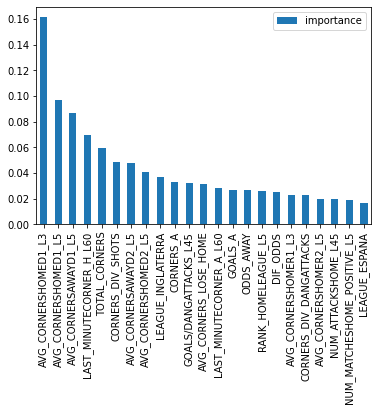

In [672]:
fu_dict = dict(zip(X_train.columns, model1.feature_importances_))
fi = pd.DataFrame(fu_dict.values(), index=fu_dict.keys(), columns=["importance"])
fi = fi.sort_values(by="importance", ascending=False)
fi = fi[fi.importance > 0.01]

fi.plot.bar()

In [134]:
fi.to_csv("feature_importance.csv")

In [78]:
y_pred1 = model1.predict(X_test)
confusion_matrix(y_test, y_pred1)

array([[ 278,  851],
       [  96, 1662]])

In [79]:
y_pred2 = model2.predict(X_test)
confusion_matrix(y_test, y_pred2)

array([[ 311,  818],
       [ 136, 1622]])

In [101]:
y_pred_proba = model1.predict_proba(X_test)[:,1]
predict_mine = np.where(y_pred_proba > 0.65, 1, 0)
cm1 = confusion_matrix(y_test, predict_mine)

In [102]:
cm1

array([[716, 413],
       [839, 919]])

In [103]:
y_pred_proba = model2.predict_proba(X_test)[:,1]
predict_mine = np.where(y_pred_proba > 0.61, 1, 0)
cm2 = confusion_matrix(y_test, predict_mine)

In [104]:
cm2

array([[754, 375],
       [930, 828]])

In [105]:
metrics.accuracy_score(y_test, y_pred1), metrics.accuracy_score(y_test, y_pred2)

(0.6719778316591618, 0.6695531693799792)

In [106]:
cm1[1][1]/(cm1[1][1]+cm1[0][1]), cm2[1][1]/(cm2[1][1]+cm2[0][1])

(0.68993993993994, 0.6882793017456359)

In [107]:
(cm1[1][1]+cm1[0][1])/len(y_test)*100, (cm2[1][1]+cm2[0][1])/len(y_test)*100

(46.13785936958781, 41.66955316937998)

# VALIDATION - BEST MODEL --> 70% accuracy in 17% of matches

In [108]:
y_pred = model1.predict(X_validation)
confusion_matrix(y_validation, y_pred)

array([[150, 565],
       [ 58, 959]])

In [109]:
metrics.accuracy_score(y_validation, y_pred)

0.6403002309468823

In [110]:
y_pred_proba = model1.predict_proba(X_validation)[:,1]
predict_mine = np.where(y_pred_proba > 0.65, 1, 0)
cm1 = confusion_matrix(y_validation, predict_mine)

In [111]:
y_pred_proba = model2.predict_proba(X_validation)[:,1]
predict_mine = np.where(y_pred_proba > 0.61, 1, 0)
cm2=confusion_matrix(y_validation, predict_mine)

In [112]:
cm1[1][1]/(cm1[1][1]+cm1[0][1]), cm2[1][1]/(cm2[1][1]+cm2[0][1])

(0.65625, 0.6565217391304348)

In [113]:
(cm1[1][1]+cm1[0][1])/len(y_validation)*100, (cm2[1][1]+cm2[0][1])/len(y_validation)*100

(44.34180138568129, 39.838337182448036)

## FINAL VALIDATION - NOVEMBER 2021

In [114]:
y_validation_november = X_validation_november.pop("output")

In [115]:
y_pred = model1.predict(X_validation_november)
confusion_matrix(y_validation_november, y_pred)

array([[ 6, 32],
       [ 3, 63]])

In [116]:
metrics.accuracy_score(y_validation_november, y_pred)

0.6634615384615384

In [117]:
y_pred = model2.predict(X_validation_november)
confusion_matrix(y_validation_november, y_pred)

array([[ 6, 32],
       [ 3, 63]])

In [118]:
metrics.accuracy_score(y_validation_november, y_pred)

0.6634615384615384

In [119]:
y_pred_proba = model1.predict_proba(X_validation_november)[:,1]
predict_mine = np.where(y_pred_proba > 0.65, 1, 0)
cm1 = confusion_matrix(y_validation_november, predict_mine)

y_pred_proba = model2.predict_proba(X_validation_november)[:,1]
predict_mine = np.where(y_pred_proba > 0.61, 1, 0)
cm2=confusion_matrix(y_validation_november, predict_mine)

In [120]:
cm1

array([[10, 28],
       [29, 37]])

In [121]:
cm2

array([[15, 23],
       [31, 35]])

In [122]:
cm1[1][1]/(cm1[1][1]+cm1[0][1]), cm2[1][1]/(cm2[1][1]+cm2[0][1])

(0.5692307692307692, 0.603448275862069)

In [123]:
(cm1[1][1]+cm1[0][1])/len(y_validation_november)*100, (cm2[1][1]+cm2[0][1])/len(y_validation_november)*100

(62.5, 55.769230769230774)